# Session 2 Exercise Notebook: Data Merging, Transformation, and Exploratory Data Analysis (EDA)
In this notebook, you will apply data merging, transformation, and EDA techniques on the Titanic dataset. Complete each task step by step. Hints are provided where necessary.


## Task 1: Grouping and Aggregation
- Group the Titanic dataset by 'Pclass' and 'Sex'.
- Calculate the average fare and survival rate for each group.
- Display the result in a new DataFrame.

### Hint:
You can use `.groupby()` to group the data and `.agg()` to apply multiple aggregation functions.


In [3]:
import pandas as pd

# Load the Titanic dataset into a DataFrame
df = pd.read_csv('D:\Komal\REDI School\Titanic-Dataset.csv')
# Group by 'Pclass' and 'Sex' and calculate the average fare and survival rate
grouped = df.groupby(['Pclass', 'Sex']).agg(
    avg_fare=('Fare', 'mean'),
    survival_rate=('Survived', 'mean')
).reset_index()

# Display the result in a new DataFrame
print(grouped)


<>:4: SyntaxWarning: invalid escape sequence '\K'
<>:4: SyntaxWarning: invalid escape sequence '\K'
C:\Users\Dell\AppData\Local\Temp\ipykernel_10896\710785705.py:4: SyntaxWarning: invalid escape sequence '\K'
  df = pd.read_csv('D:\Komal\REDI School\Titanic-Dataset.csv')


   Pclass     Sex    avg_fare  survival_rate
0       1  female  106.125798       0.968085
1       1    male   67.226127       0.368852
2       2  female   21.970121       0.921053
3       2    male   19.741782       0.157407
4       3  female   16.118810       0.500000
5       3    male   12.661633       0.135447


## Task 2: Creating a Pivot Table
- Create a pivot table showing the survival rates by passenger class ('Pclass') and embarkation port ('Embarked').
- Use 'Survived' as the values, 'Pclass' as the index, and 'Embarked' as the columns.
- Calculate the mean of the 'Survived' column.

### Hint:
Use Pandas' `pivot_table()` function to create the pivot table.


In [4]:


# Create the pivot table
pivot_table = df.pivot_table(
    values='Survived',
    index='Pclass',
    columns='Embarked',
    aggfunc='mean'
)

# Display the pivot table
print(pivot_table)


Embarked         C         Q         S
Pclass                                
1         0.694118  0.500000  0.582677
2         0.529412  0.666667  0.463415
3         0.378788  0.375000  0.189802


## Task 3: Detecting and Handling Outliers
- Identify outliers in the 'Fare' column using the IQR (Interquartile Range) method.
- Remove or replace any outliers in the dataset.

### Hint:
To calculate IQR, find the 25th and 75th percentiles and use them to detect outliers.


In [8]:


# Calculate the IQR and determine the bounds
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Identify the outliers
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

# Remove the outliers from the dataset
df_no_outliers = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

# Replace the outliers in the original DataFrame with the median 'Fare' value
df['Fare'] = df['Fare'].apply(lambda x: x if lower_bound <= x <= upper_bound else df['Fare'].median())

# Display the updated DataFrames to confirm the changes
print("DataFrame without outliers:")
print(df_no_outliers.head())

print("Original DataFrame with outliers replaced by median:")
print(df.head())



Lower Bound: -8.349, Upper Bound: 35.0094
Number of outliers: 34
DataFrame without outliers:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  14.4542   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0       

## Task 4: Exploratory Data Analysis (EDA)
- Perform EDA to analyze survival rates across different passenger segments (e.g., by 'Sex', 'Pclass', 'Age Group').
- Use visualizations such as bar charts, histograms, or box plots to illustrate your findings.

### Hint:
You can use Seaborn or Matplotlib for visualizations (e.g., `sns.barplot()`, `plt.hist()`).


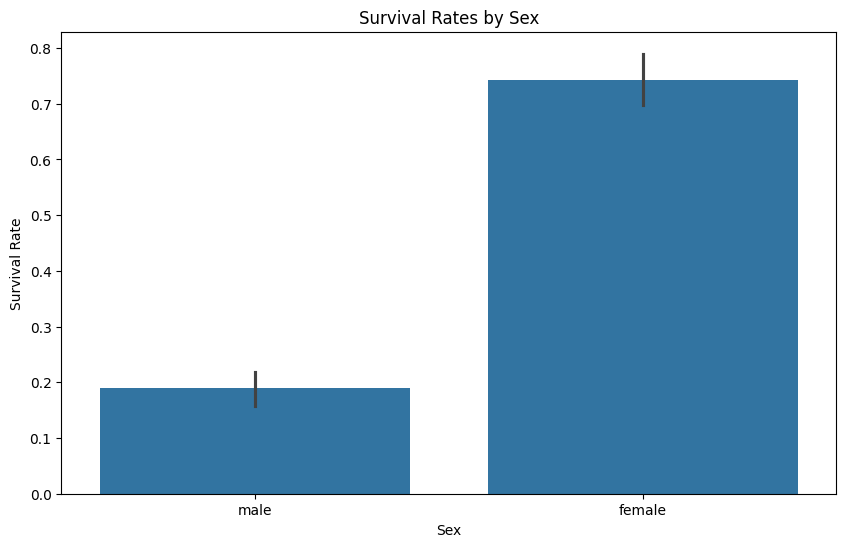

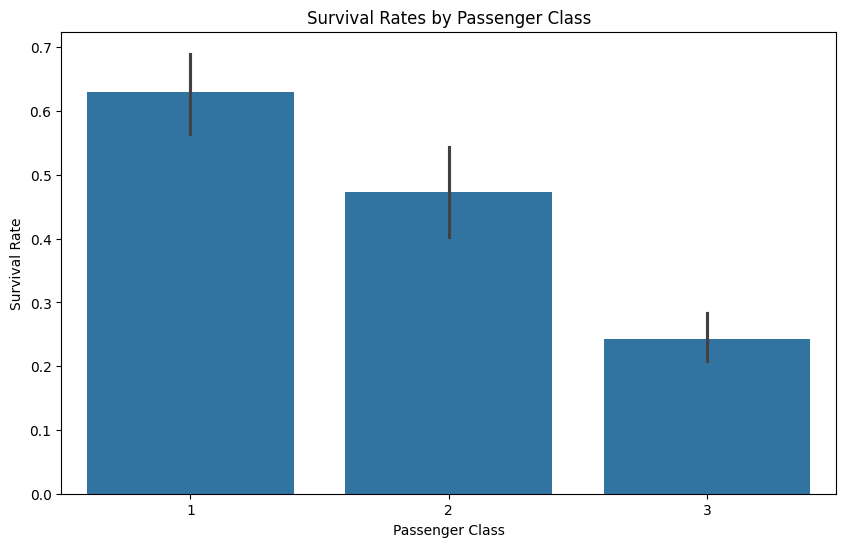

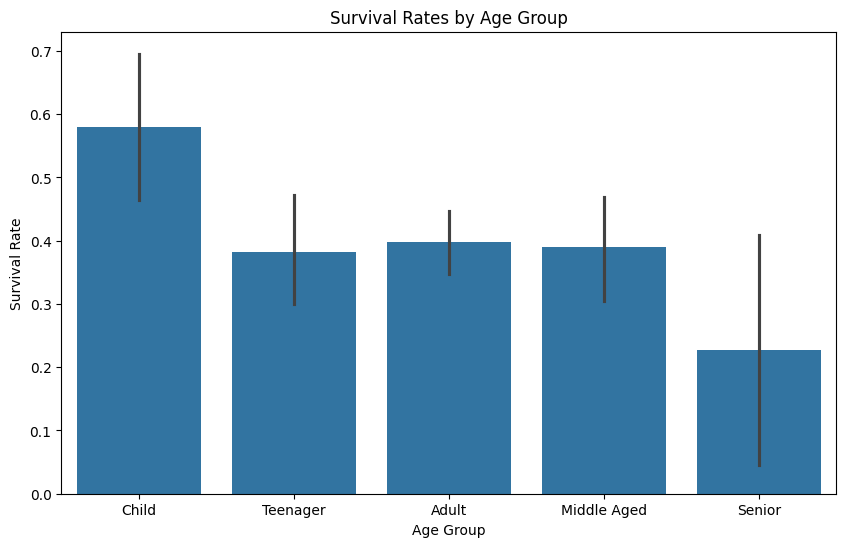

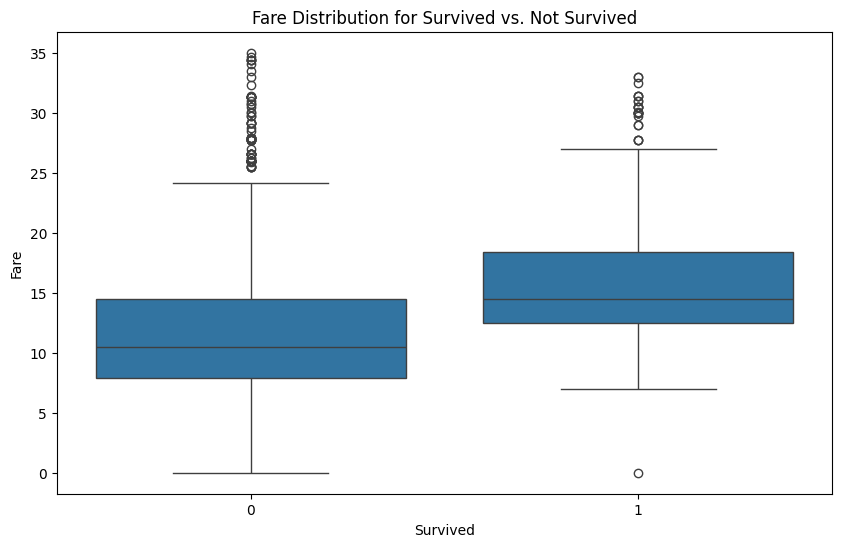

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Survival Rates by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rates by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Survival Rates by Passenger Class (Pclass)
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Survival Rates by Age Group
# Create Age Groups
bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle Aged', 'Senior']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Survived', data=df)
plt.title('Survival Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

# Fare Distribution for Survived vs. Not Survived
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution for Survived vs. Not Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()


## Task 5: Feature Engineering
- Create a new column called 'Age Group' that divides passengers into age categories (e.g., 'Child', 'Adult', 'Senior').
- Use this new column to group passengers and calculate the survival rate for each age group.

### Hint:
Use Pandas' `pd.cut()` to create the 'Age Group' column and then `groupby()` to analyze survival rates.


In [15]:


# Create Age Groups
bins = [0, 12, 18, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Senior']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Calculate the survival rate for each age group
survival_rate_by_age_group = df.groupby('Age Group')['Survived'].mean().reset_index()

# Display the result
print(survival_rate_by_age_group)


  Age Group  Survived
0     Child  0.579710
1  Teenager  0.428571
2     Adult  0.388788
3    Senior  0.227273


C:\Users\Dell\AppData\Local\Temp\ipykernel_10896\3916309919.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age_group = df.groupby('Age Group')['Survived'].mean().reset_index()
